# MACHINE LEARNING ALGORITHM

###### Author: Ms. Sharon Veerayah
###### Project: Random ML Project

## RANDOM FOREST

#### Dataset
https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict.csv 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
%matplotlib inline

### Load the data

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
print(df.shape)
list(df)

(400, 9)


['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [5]:
df.count()

Serial No.           400
GRE Score            400
TOEFL Score          400
University Rating    400
SOP                  400
LOR                  400
CGPA                 400
Research             400
Chance of Admit      400
dtype: int64

In [6]:
list(df)

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [7]:
#data = df[['GRE Score','Research']]
data = df[['GRE Score', 'TOEFL Score', 'University Rating',
 'CGPA', 'Research']]
data.head()

,GRE Score,TOEFL Score,University Rating,CGPA,Research
0,337,118,4,9.65,1
1,324,107,4,8.87,1
2,316,104,3,8.00,1
3,322,110,3,8.67,1
4,314,103,2,8.21,0


# DECISION TREE

In [28]:
### Import libaries

In [8]:
# Train Test Split
from sklearn.model_selection import train_test_split
# To fit the model (training and prediction)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# For classification report (model evaluation)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



### Prepare the Dataset

In [9]:
X =df[['GRE Score', 'TOEFL Score', 'University Rating',  'CGPA']]
y = pd.Categorical(data['Research'])

### Training and Test Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 51)                                                   


## Create model with n trees.
* any n value

In [11]:
# Initial Random Forest
model = DecisionTreeClassifier(max_depth=3)
#Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## Predictions

In [12]:
# will be the actual result
pred = model.predict(X_test)

In [13]:
pred

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [14]:
y_test

[1, 0, 1, 0, 0, ..., 1, 0, 0, 1, 1]
Length: 80
Categories (2, int64): [0, 1]

#### HOw does the tree look like?

In [15]:
text_rep = tree.export_text(model)
print(text_rep)

|--- feature_0 <= 319.50
|   |--- feature_0 <= 310.50
|   |   |--- feature_3 <= 8.65
|   |   |   |--- class: 0
|   |   |--- feature_3 >  8.65
|   |   |   |--- class: 1
|   |--- feature_0 >  310.50
|   |   |--- feature_0 <= 311.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  311.50
|   |   |   |--- class: 0
|--- feature_0 >  319.50
|   |--- feature_3 <= 9.14
|   |   |--- feature_3 <= 8.05
|   |   |   |--- class: 0
|   |   |--- feature_3 >  8.05
|   |   |   |--- class: 1
|   |--- feature_3 >  9.14
|   |   |--- feature_0 <= 338.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  338.50
|   |   |   |--- class: 1



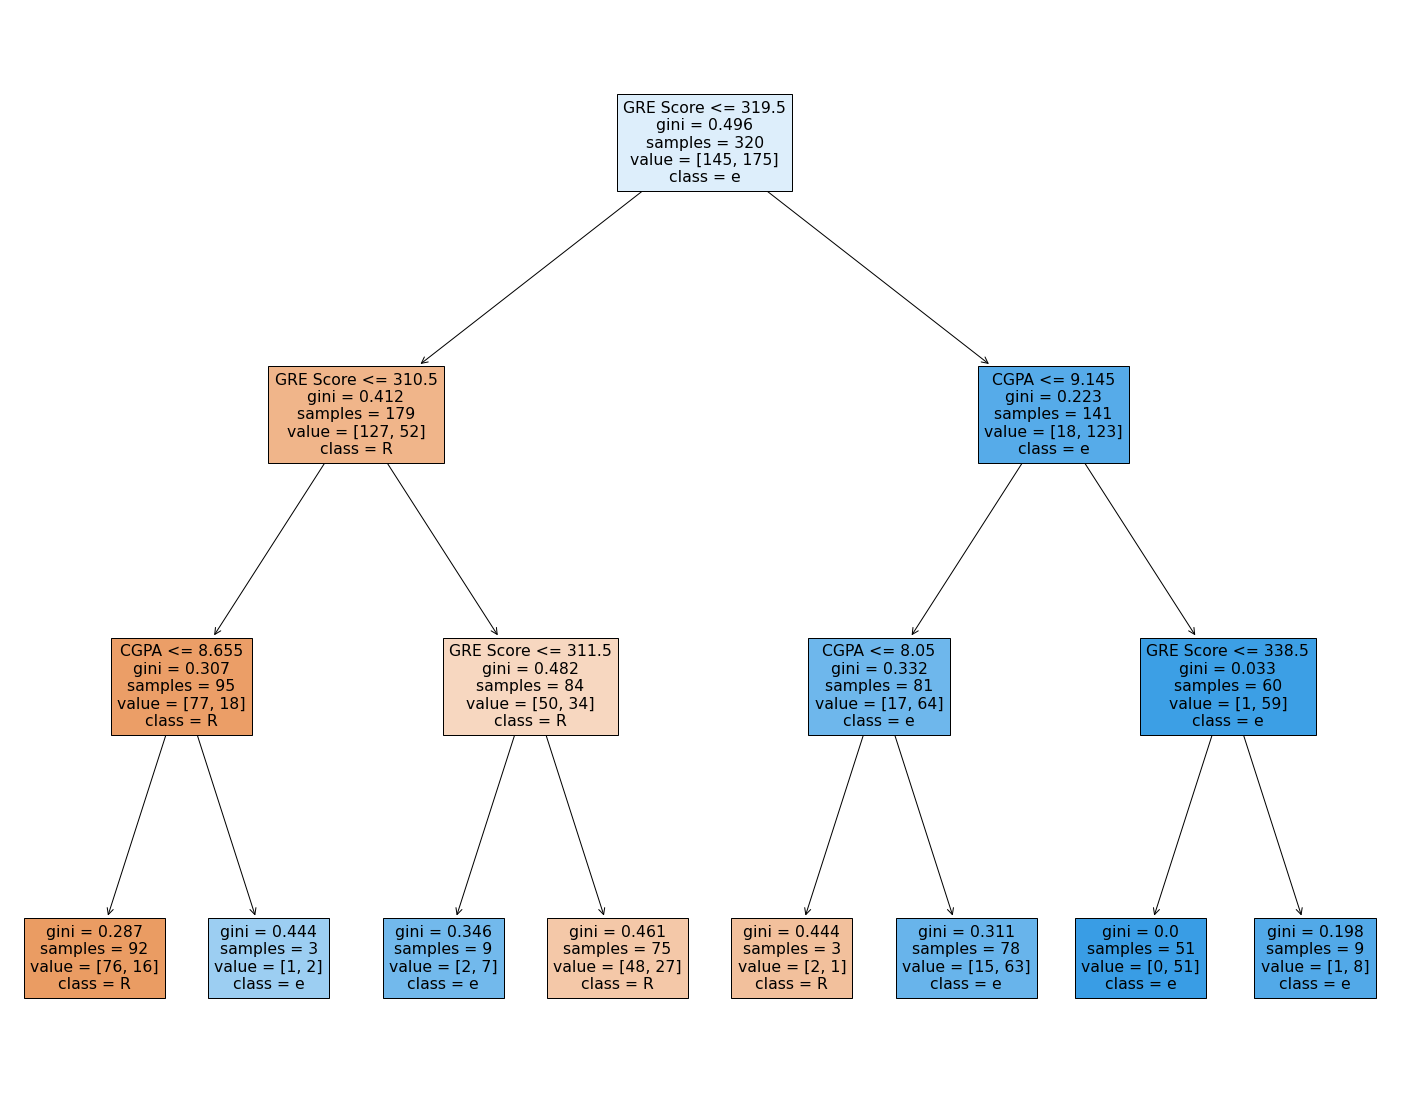

In [16]:
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(model, 
                   feature_names =['GRE Score', 'TOEFL Score', 'University Rating',  'CGPA'],
                  class_names = 'Research',
                  filled = True)


# Model Evaluation - Measure Accuracy

In [ ]:
#### Confusion Matrix

In [17]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))

Confusion Matrix:
[[29  7]
 [13 31]]


### Accuracy Score

In [18]:
print("Accuracy Score:")
print(accuracy_score(y_test, pred))

Accuracy Score:
0.75


#### Using Classification report, let us check the Precision, Recall, f1 score 

In [19]:
print("Classification Report:")
print(classification_report(y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.74        36
           1       0.82      0.70      0.76        44

    accuracy                           0.75        80
   macro avg       0.75      0.76      0.75        80
weighted avg       0.76      0.75      0.75        80



# THANK YOU!